In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def display(img, cmap = None, figsize = (5, 5)):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap = cmap)
    ax.axis('off')

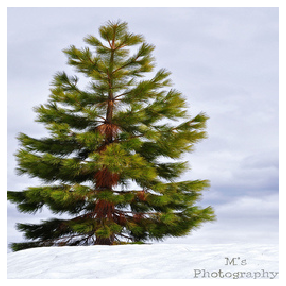

In [2]:
img = cv2.imread("Images/2011-05-27 03_45_48.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
display(img)

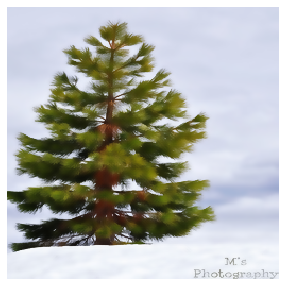

In [3]:
img_blur = cv2.bilateralFilter(img, d = 7, sigmaSpace = 75, sigmaColor = 75)
display(img_blur)

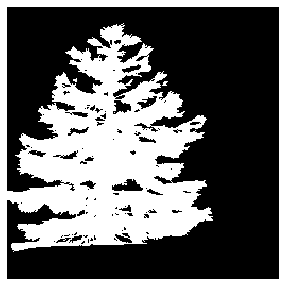

In [4]:
img_gray = cv2.cvtColor(img_blur, cv2.COLOR_RGB2GRAY)
a = img_gray.max()
_, img_thresh = cv2.threshold(img_gray, a//2+10, a, cv2.THRESH_BINARY_INV)
display(img_thresh, 'gray')

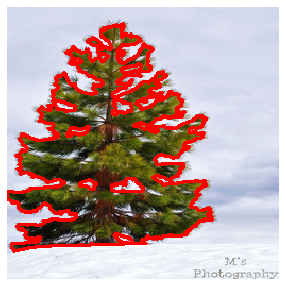

In [5]:
contours, hierarchy = cv2.findContours(img_thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]

img_copy = img.copy()

final = cv2.drawContours(img_copy, contours, contourIdx = -1, 
                         color = (255, 0, 0), thickness = 2)
display(final)

In [6]:
c_0 = contours[0]
for c in c_0:
    x, y = c[0]
    if y == 145:
        print(c)

[[ 12 145]]
[[140 145]]


In [7]:
M = cv2.moments(c_0)
print(M.keys())

dict_keys(['m00', 'm10', 'm01', 'm20', 'm11', 'm02', 'm30', 'm21', 'm12', 'm03', 'mu20', 'mu11', 'mu02', 'mu30', 'mu21', 'mu12', 'mu03', 'nu20', 'nu11', 'nu02', 'nu30', 'nu21', 'nu12', 'nu03'])


In [8]:
print("1st Contour Area : ", cv2.contourArea(contours[0]))
print("2nd Contour Area : ", cv2.contourArea(contours[1]))
print("3rd Contour Area : ", cv2.contourArea(contours[2]))
print()
print("1st Contour Arc Length (Closed): ", cv2.arcLength(contours[0], closed = True))
print("1st Contour Arc Length (Open): ", cv2.arcLength(contours[0], closed = False))

1st Contour Area :  22612.5
2nd Contour Area :  234.5
3rd Contour Area :  163.5

1st Contour Arc Length (Closed):  2184.9860520362854
1st Contour Arc Length (Open):  2183.5718384981155


In [9]:
cx = int(M['m10'] / M['m00'])
cy = int(M['m01'] / M['m00'])

l_m = tuple(c_0[c_0[:, :, 0].argmin()][0])
r_m = tuple(c_0[c_0[:, :, 0].argmax()][0])
t_m = tuple(c_0[c_0[:, :, 1].argmin()][0])
b_m = tuple(c_0[c_0[:, :, 1].argmax()][0])

pst = [l_m, r_m, t_m, b_m]
xcor = [p[0] for p in pst]
ycor = [p[1] for p in pst]

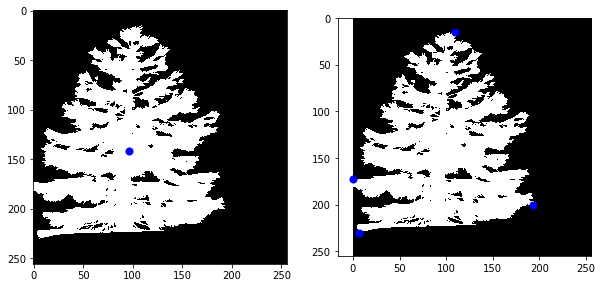

In [10]:
plt.figure(figsize = (10, 16))
plt.subplot(1, 2, 1)
plt.imshow(img_thresh, cmap = 'gray')
plt.scatter([cx], [cy], c = 'b', s = 50)

plt.subplot(1, 2, 2)
plt.imshow(img_thresh, cmap = 'gray')
plt.scatter(xcor, ycor, c = 'b', s = 50)

In [11]:
c_0 = contours[0]

x, y, w, h = cv2.boundingRect(c_0)

img_copy = img.copy()

img_box = cv2.rectangle(img_copy, (x, y), (x+w, y+h), color = (255, 0, 0), thickness = 2)

In [12]:
rect = cv2.minAreaRect(c_0)
box = cv2.boxPoints(rect)
box = box.astype('int')

img_copy = img.copy()

img_box_2 = cv2.drawContours(img_copy, contours = [box], 
                           contourIdx = -1, 
                           color = (255, 0, 0), thickness = 2)

(-0.5, 255.5, 255.5, -0.5)

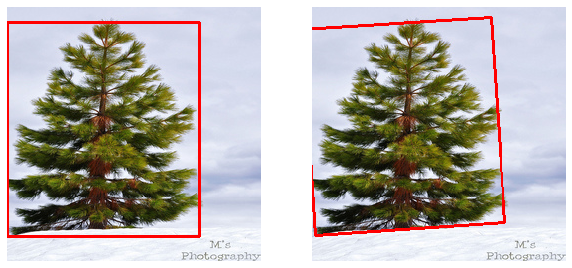

In [13]:
plt.figure(figsize = (10, 16))

plt.subplot(1, 2, 1)
plt.imshow(img_box)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(img_box_2)
plt.axis('off')

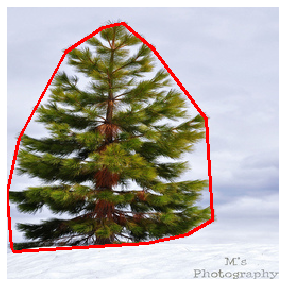

In [14]:
hull = cv2.convexHull(c_0)

img_copy = img.copy()
img_hull = cv2.drawContours(img_copy, contours = [hull], contourIdx = 0, 
                            color = (255, 0, 0), thickness = 2)
display(img_hull)